In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
import seaborn as sns
import csv
import random 

import h5py

In [3]:
cutout_dir = os.path.expandvars("$SCRATCH") + '/'
image_dir = "/home/anahoban/projects/rrg-kyi/astro/cfis/W3/"
file_name = "confirmed_cfis_64p.h5"
scratch = os.path.expandvars('$SCRATCH') + '/'
#cutouts file
print('opening file')
hf = h5py.File(cutout_dir + file_name, "r")

opening file


In [4]:
master_cat = pd.read_csv(scratch+'master_catalogue.csv')

In [5]:
master_cat = master_cat.dropna()

In [6]:
#change those cols to strings
master_cat['TILE'].apply(str)
master_cat['BAND'].apply(str)

1         u
2         u
3         u
4         u
5         u
         ..
103596    u
103597    u
103598    u
103599    u
103600    u
Name: BAND, Length: 103599, dtype: object

In [7]:
need_fix = list(master_cat['TILE'].unique())
fixed = list(hf.keys())

In [8]:
fix_dict = {j: fixed[i] for i,j in enumerate(need_fix)}
master_cat['TILE'] = master_cat['TILE'].replace(fix_dict)

In [9]:
master_cat

,Unnamed: 0,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,...,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,ISOAREA_IMAGE,MU_MAX,FLUX_RADIUS,FLAGS,TILE,BAND,CUTOUT
1,101,102.0,8682.0068,175.7034,1.810001,-0.248942,24.6370,0.3051,24.6370,0.3051,...,0.000011,85.15,89.75,6.0,23.5522,1.619,0.0,004.180,u,c101
2,1010,1011.0,6773.0195,1870.0000,1.908508,-0.161515,24.0965,0.2219,24.0965,0.2219,...,0.000006,-90.00,-90.00,2.0,23.6126,2.422,0.0,004.180,u,c1010
3,1016,1017.0,4769.4888,1877.5187,2.011895,-0.161127,24.9089,0.4511,24.9089,0.4511,...,0.000009,-46.02,18.80,3.0,23.5518,1.410,0.0,004.180,u,c1016
4,1070,1071.0,4596.8198,1938.1915,2.020805,-0.157996,24.3398,0.3159,24.3398,0.3159,...,0.000009,43.82,44.91,5.0,22.9621,1.732,0.0,004.180,u,c1070
5,1076,1077.0,8092.9961,1941.0000,1.840395,-0.157851,24.7070,0.3882,24.7070,0.3882,...,0.000006,-90.00,-90.00,3.0,24.4147,1.734,0.0,004.180,u,c1076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103596,9724,9725.0,7504.3320,9606.3154,356.870771,0.237695,25.1215,0.2725,25.1215,0.2725,...,0.000012,45.82,44.98,1.0,23.5814,1.757,0.0,714.180,u,c9724
103597,9735,9736.0,924.3973,9668.8232,357.210310,0.240919,25.0175,0.4834,25.0175,0.4834,...,0.000016,81.07,82.30,11.0,24.0934,1.863,0.0,714.180,u,c9735
103598,9756,9757.0,1998.9895,9392.6816,357.154859,0.226671,24.6522,0.2776,24.6522,0.2776,...,0.000011,-12.98,-13.23,8.0,24.0695,2.592,0.0,714.180,u,c9756
103599,9763,9764.0,2003.9287,9628.6689,357.154604,0.238848,24.8426,0.3540,24.8426,0.3540,...,0.000015,10.83,10.65,10.0,24.1534,2.171,0.0,714.180,u,c9763


---
## Training set

In [10]:
with open('cutouts_adresses.csv', newline='') as f:
    reader = csv.reader(f)
    cutout_ids = list(reader)[0]
    
random.Random(4).shuffle(cutout_ids)
train, validate, test = np.split(cutout_ids, [int(.7*len(cutout_ids)), int(.9*len(cutout_ids))])

In [11]:
validating_tiles = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(validate)]

training_tiles   = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(train)]

testing_tiles    = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(test)]

In [94]:
len(testing_tiles)

10351

In [12]:
len(testing_tiles)+len(training_tiles)+len(testing_tiles) #not all here for some reason

93222

In [22]:
len(training_tiles)

72520

In [14]:
print(training_tiles['BAND'].value_counts())
#print(master_cat['TILE'].value_counts())

r    44226
u    28294
Name: BAND, dtype: int64


In [15]:
print(training_tiles[training_tiles['BAND'] == 'u']['TILE'].value_counts())
print(training_tiles[training_tiles['BAND'] == 'r']['TILE'].value_counts())

222.232    300
464.230    299
398.226    297
669.179    294
326.219    294
          ... 
373.180    266
314.228    266
661.219    265
690.181    265
329.253    257
Name: TILE, Length: 101, dtype: int64
214.269    304
163.275    302
407.242    299
197.287    298
386.248    296
          ... 
229.296    258
236.293    256
259.286    254
378.272    253
296.253    250
Name: TILE, Length: 158, dtype: int64


Text(0.5, 1.0, 'testing set')

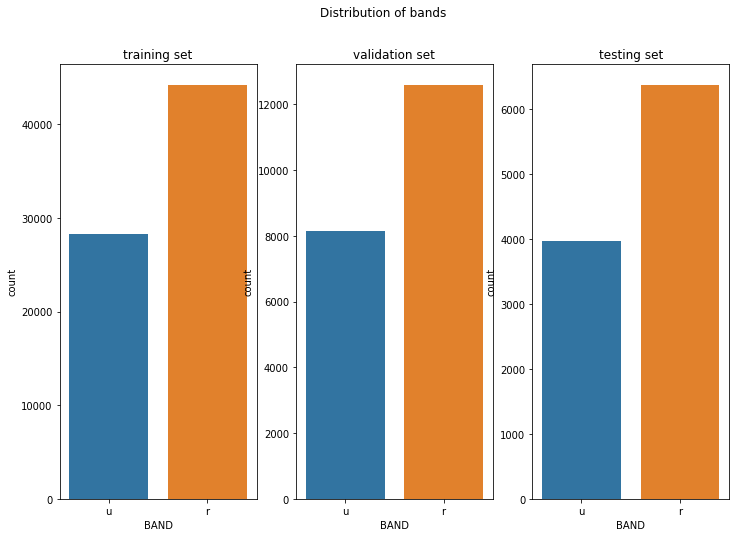

In [16]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(1,3, figsize=(12,8))
fig.suptitle('Distribution of bands')
sns.countplot(x='BAND', data =  training_tiles, ax = axes[0])
# g.set_xticklabels(g.get_xticklabels(), rotation=60)
sns.countplot(x='BAND', data = validating_tiles, ax = axes[1])
sns.countplot(x='BAND', data = testing_tiles, ax = axes[2])
axes[0].set_title('training set')
axes[1].set_title('validation set')
axes[2].set_title('testing set')

In [17]:
training_tiles.keys()

Index(['Unnamed: 0', 'NUMBER', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000',
       'DELTA_J2000', 'MAG_AUTO', 'MAGERR_AUTO', 'MAG_BEST', 'MAGERR_BEST',
       'MAG_APER', 'MAGERR_APER', 'A_WORLD', 'ERRA_WORLD', 'B_WORLD',
       'ERRB_WORLD', 'THETA_J2000', 'ERRTHETA_J2000', 'ISOAREA_IMAGE',
       'MU_MAX', 'FLUX_RADIUS', 'FLAGS', 'TILE', 'BAND', 'CUTOUT'],
      dtype='object')

KeyboardInterrupt: 

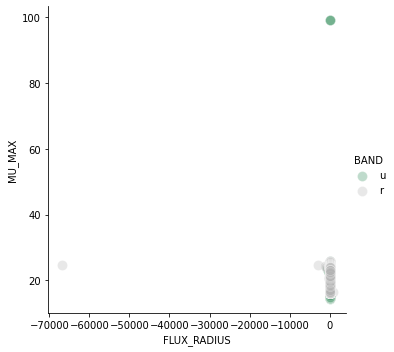

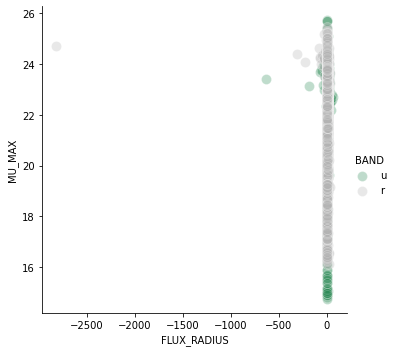

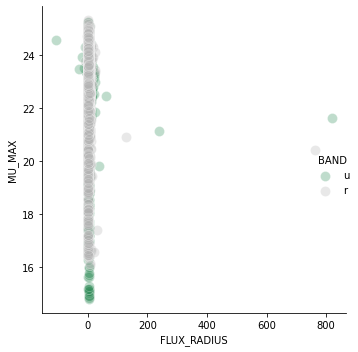

In [18]:
pal = dict(u="seagreen", r=".7")

g = sns.FacetGrid(training_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MU_MAX", s=100, alpha=.3)
g.add_legend()
# g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('training')

g = sns.FacetGrid(validating_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MU_MAX", s=100, alpha=.3)
g.add_legend()
# g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('validation')

g = sns.FacetGrid(testing_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MU_MAX", s=100, alpha=.3)
g.add_legend()
# g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('testing')

In [ ]:
training_tiles[training_tiles['BAND'] == 'u']['FLAGS'].value_counts()

In [ ]:
#matrix plot
sns.set_theme(style="ticks")
df = pd.DataFrame(training_tiles,columns = ['MU_MAX','FLAGS',"FLUX_RADIUS", "MAG_AUTO",'BAND'])

g = sns.pairplot(df, hue="BAND",diag_kind ='hist')
g.title('Training tiles')
#axes limits
n = range(4)
for i in n:
    #vertical
    g.axes[0,i].set_ylim((0,30))
    g.axes[2,i].set_ylim((-30,30))
    g.axes[3,i].set_ylim((0,30))
    
    #horizontal
    g.axes[i,0].set_xlim((0,30))
    g.axes[i,2].set_xlim((-30,30))
    g.axes[i,3].set_xlim((0,30))
    
#setting diagonal lims
g.axes[0,0].set_xlim((20,25))
g.axes[3,3].set_xlim((0,10))
g.axes[3,3].set_xlim((20,25))


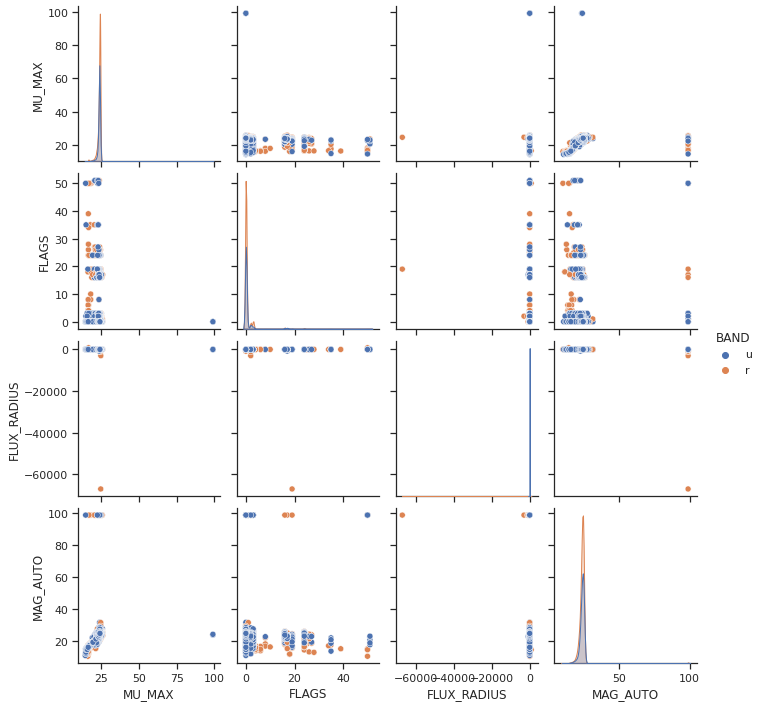

In [18]:
#matrix plot
sns.set_theme(style="ticks")

df = pd.DataFrame(training_tiles,columns = ['MU_MAX','FLAGS',"FLUX_RADIUS", "MAG_AUTO",'BAND'])
sns.pairplot(df, hue="BAND")

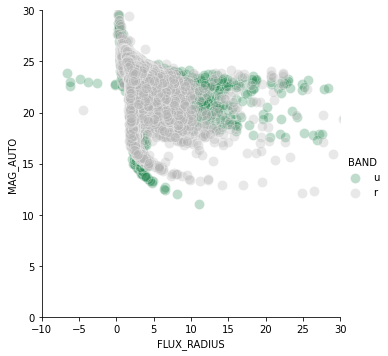

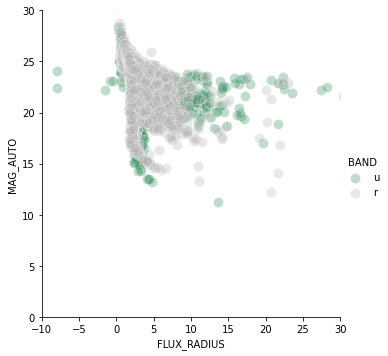

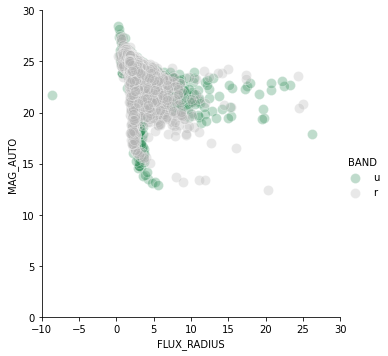

In [16]:
#matrix plot
pal = dict(u="seagreen", r=".7")

g = sns.FacetGrid(training_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.1)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(20, 25))
#g.title('training')

g = sns.FacetGrid(validating_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.3)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('validation')

g = sns.FacetGrid(testing_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.3)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('testing')

In [32]:
mu_train = pd.DataFrame(training_tiles,columns = ['MU_MAX'])
mu_test = pd.DataFrame(testing_tiles,columns = ['MU_MAX'])
mu_val = pd.DataFrame(validating_tiles,columns = ['MU_MAX'])

mag_train = pd.DataFrame(training_tiles,columns = ['MAG_AUTO'])
mag_test = pd.DataFrame(testing_tiles,columns = ['MAG_AUTO'])
mag_val = pd.DataFrame(validating_tiles,columns = ['MAG_AUTO'])

Text(0.5, 1.0, 'MAG_AUTO testing set')

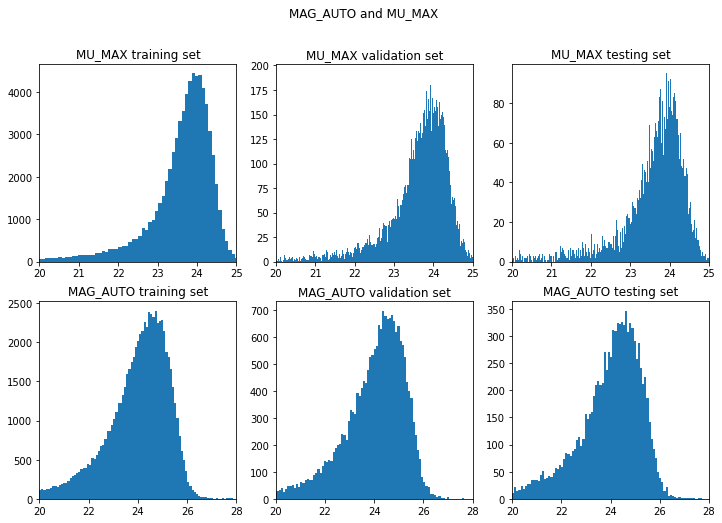

In [36]:
#plt.hist(df,bins = 1000);
#plt.xlim((20,25))

fig, axes = plt.subplots(2,3, figsize=(12,8))
fig.suptitle('MAG_AUTO and MU_MAX')


axes[0,0].hist(mu_train,bins = 1000);
axes[0,0].set_xlim((20,25))
axes[0,1].hist(mu_val,bins = 1000);
axes[0,1].set_xlim((20,25))
axes[0,2].hist(mu_test,bins = 1000);
axes[0,2].set_xlim((20,25))

axes[1,0].hist(mag_train,bins = 1000);
axes[1,0].set_xlim((20,28))
axes[1,1].hist(mag_val,bins = 1000);
axes[1,1].set_xlim((20,28))
axes[1,2].hist(mag_test,bins = 1000);
axes[1,2].set_xlim((20,28))


axes[0,0].set_title('MU_MAX training set')
axes[0,1].set_title('MU_MAX validation set')
axes[0,2].set_title('MU_MAX testing set')

axes[1,0].set_title('MAG_AUTO training set')
axes[1,1].set_title('MAG_AUTO validation set')
axes[1,2].set_title('MAG_AUTO testing set')

In [19]:
print(master_cat[master_cat['BAND'] == 'u'].describe()['MAG_AUTO'])
master_cat.describe()

,Unnamed: 0,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,...,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,ISOAREA_IMAGE,MU_MAX,FLUX_RADIUS,FLAGS
count,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,...,103599.000000,1.035990e+05,103599.000000,1.035990e+05,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000
mean,12475.041033,12476.041033,4945.397696,5049.260075,193.208902,35.469370,24.012251,0.421029,23.936078,0.312554,...,0.000097,1.232593e-05,0.000068,8.102172e-06,-1.072422,-0.920665,79.555546,23.471600,2.160498,0.534551
std,10852.351094,10852.351094,2893.201035,2927.612473,75.973010,18.355459,3.908649,4.825558,3.076278,3.554248,...,0.000168,5.906326e-06,0.000053,3.156475e-06,53.958449,53.981622,678.803548,1.260457,208.615000,2.620958
min,0.000000,1.000000,1.265100,1.276800,1.742213,-0.459539,10.518600,0.000000,10.518600,0.000000,...,0.000026,4.106969e-08,0.000010,1.216712e-08,-90.000000,-90.000000,0.000000,14.388200,-66970.680000,0.000000
25%,3837.500000,3838.500000,2435.623150,2519.573000,150.184849,23.947037,23.239900,0.097200,23.247550,0.092800,...,0.000053,8.618857e-06,0.000035,6.284924e-06,-45.750000,-45.080000,7.000000,23.266850,2.037000,0.000000
50%,8660.000000,8661.000000,4915.126000,5110.701700,206.304698,37.567234,24.188800,0.173200,24.192200,0.170300,...,0.000081,1.240553e-05,0.000057,8.548104e-06,-0.470000,-0.060000,18.000000,23.769100,2.620000,0.000000
75%,19778.000000,19779.000000,7453.703100,7605.591550,230.304321,51.930760,24.881200,0.247500,24.879400,0.245700,...,0.000118,1.575003e-05,0.000089,1.018066e-05,45.250000,45.020000,46.000000,24.122350,3.409000,0.000000
max,78060.000000,78061.000000,10000.000000,9999.689500,357.256868,70.683577,99.000000,248.908000,99.000000,223.015900,...,0.032449,7.650581e-05,0.005596,2.591709e-05,90.000000,90.000000,90987.000000,99.000000,818.761000,51.000000


---- 
## Residuals distributions


In [40]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

In [46]:
bands=2
def MSE_with_uncertainty(y_true, y_pred): 
    weights = y_pred[...,bands:] 
    y_pred_image = y_pred[...,:bands]
    
    return K.square(tf.math.multiply((y_true - y_pred_image), weights ) )

def get_test_cutouts(index, n_cutouts, cutout_size, bands="cfis", start=0):
    n = 0
    if bands == "all":
        band_indices = [0, 1, 2, 3, 4]
        l = len(band_indices)
        sources = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        weights = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        
        
    elif bands == "cfis":
        band_indices = [0,2]
        l = len(band_indices)
        sources = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        weights = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        
    else: # PS1
        band_indices = [1, 3, 4]
        l = len(band_indices)
        sources = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        weights = np.zeros((n_cutouts, cutout_size, cutout_size, l))
        
    img_group = hf.get(tile_ids[index] + "/IMAGES")
    wt_group = hf.get(tile_ids[index] + "/WEIGHTS")
    cutouts = list(img_group.keys())
    for i in cutouts:
        sources[n,:,:,:] = np.array(img_group.get(f"{i}"))[:,:,band_indices]
        weights[n,:,:,:] = np.array(wt_group.get(f"{i}"))[:,:,band_indices]
        n += 1
        if n == n_cutouts:
            #return sources #if no weights
            return np.concatenate((sources, weights), axis=-1) #if we train with weights

In [38]:
tile_ids = list(hf.keys())
CUTOUT_SIZE = 64

In [44]:
autoencoder_cfis = keras.models.load_model("../../Models/job13.h5", custom_objects={'MSE_with_uncertainty': MSE_with_uncertainty})

In [63]:
test_index = 69
sources_test_cfis = get_test_cutouts(test_index, 402, CUTOUT_SIZE, "cfis")
sources_test_cfis.shape

(402, 64, 64, 4)

In [64]:
decoded_imgs_cfis = autoencoder_cfis.predict(sources_test_cfis)
residuals_cfis = sources_test_cfis - decoded_imgs_cfis

In [73]:
avg_res= np.mean(residuals_cfis[...,[0,2]].reshape(402,64*64*2), axis = -1)[2:] #not looking at c0-r, c0-u

In [81]:
master_cat.keys()

Index(['Unnamed: 0', 'NUMBER', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000',
       'DELTA_J2000', 'MAG_AUTO', 'MAGERR_AUTO', 'MAG_BEST', 'MAGERR_BEST',
       'MAG_APER', 'MAGERR_APER', 'A_WORLD', 'ERRA_WORLD', 'B_WORLD',
       'ERRB_WORLD', 'THETA_J2000', 'ERRTHETA_J2000', 'ISOAREA_IMAGE',
       'MU_MAX', 'FLUX_RADIUS', 'FLAGS', 'TILE', 'BAND', 'CUTOUT'],
      dtype='object')

In [84]:
sorted_cat_tile69 = master_cat[master_cat['TILE'] == '222.247'].sort_values(by = 'Unnamed: 0')

In [86]:
mu_max = pd.DataFrame(sorted_cat_tile69, columns = ['MU_MAX'])

Text(0, 0.5, 'avg pixel value')

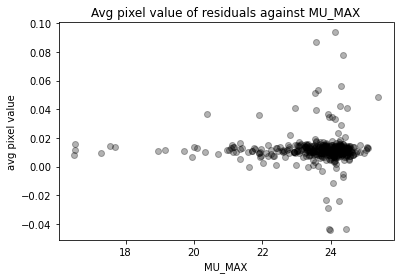

In [93]:
plt.title('Avg pixel value of residuals against MU_MAX')
plt.scatter(mu_max, avg_res, color= 'k', alpha = 0.3)
plt.xlabel('MU_MAX')
plt.ylabel('avg pixel value')